# 6. 비선형 활성화 함수(Activation function)
선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없다


<img src="https://wikidocs.net/images/page/60683/simple-neural-network.png" width="400" height="200">   

  
입력에 대해서 순전파 연산
-> 순전파 연산을 통해 나온 예측값과 실체값의 오차를 손실함수를 통해 계산


## 1. 시그모이드 함수(Sigmoid function)와 기울기 소실

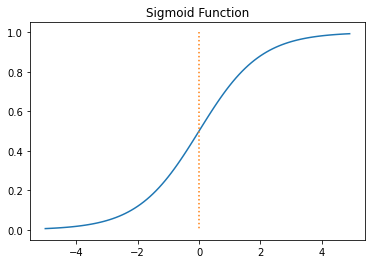

In [4]:
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1) # -5에서 5사이에서 0.1씩
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않는다 => 기울기 소실(vanishing gradient)문제

### 시그모이드 함수를 은닉층에서 사용하는 것은 지양한다!


## 2. 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

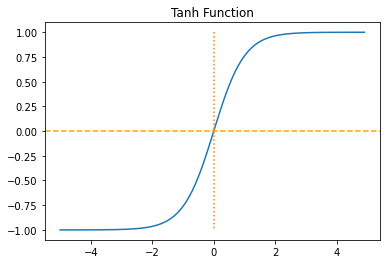

In [5]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환
0을 중심으로 하고 있어서 시그모이드에 비해 반환값의 변환폭이 더 크다.
그래서 시그모이드 보다는 기울기 소실 증상이 적은 편이다.

### 은닉층에서 시그모이드 함수보다는 tanh 함수가 더 많이 쓰인다.

## 3.  렐루 함수(ReLU)

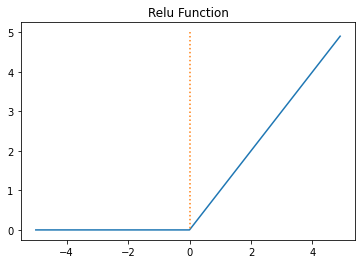

In [6]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

* 렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환한다.
* 렐루 함수는 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동한다.
* 연산 속도가 빠르다.  
<단점>
* 입력값이 음수면 기울기도 0이 된다. -> dying relu(죽은 렐루)

## 4.리키 렐루(Leaky ReLU)

죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작
Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환

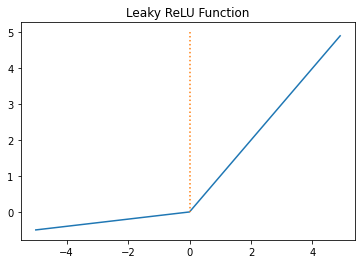

In [7]:
a=0.1
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

## 5. 소프트맥스 함수(Softamx function)

분류 문제를 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용

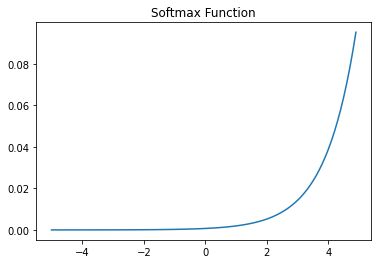

In [8]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()


||||
|:---:|:---:|:---:|
|문제|	활성화 함수|	비용 함수|
|이진 분류|	시그모이드|	nn.BCELoss()|
|다중 클래스 분류|	소프트맥스|	nn.CrossEntropyLoss()|
|회귀|	없음|	MSE|

# nn.CrossEntropyLoss()는 소프트맥스 함수를 이미 포함하고 있다!
